                        === Estudando estatística com a IA = Proporções, porcentagens e análise por categoria ===

Adicionando as bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Pegando o dataset do própria seaborn

In [3]:
tips = sns.load_dataset("tips")

Fazendo visualizações para primeira impressão do dataset

In [4]:
print(tips.head())
print(tips.info())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


Vou calcular a proporção de fumantes

In [5]:
tips["smoker"].value_counts(normalize= True) * 100

smoker
No     61.885246
Yes    38.114754
Name: proportion, dtype: float64

38% dos clientes são fumantes

In [6]:
tips["sex"].value_counts(normalize=True) * 100

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64

36% = Mulheres
64% = Homens

                      Descobrindo a % de homens e mulheres que vão em cada dia da semana

In [7]:
tips.groupby("day")["sex"].value_counts(normalize=True) * 100

C:\Users\Cauan\AppData\Local\Temp\ipykernel_14128\209567748.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("day")["sex"].value_counts(normalize=True) * 100


day   sex   
Thur  Female    51.612903
      Male      48.387097
Fri   Male      52.631579
      Female    47.368421
Sat   Male      67.816092
      Female    32.183908
Sun   Male      76.315789
      Female    23.684211
Name: proportion, dtype: float64

              A mesma coisa de cima mas agora com fumantes

In [8]:
tips.groupby("day")["smoker"].value_counts(normalize=True) * 100

C:\Users\Cauan\AppData\Local\Temp\ipykernel_14128\2644834069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("day")["smoker"].value_counts(normalize=True) * 100


day   smoker
Thur  No        72.580645
      Yes       27.419355
Fri   Yes       78.947368
      No        21.052632
Sat   No        51.724138
      Yes       48.275862
Sun   No        75.000000
      Yes       25.000000
Name: proportion, dtype: float64

             Gráfico de barras mostrando a porcentagem de fumantes e não fumantes por dia(Quinta, Sexta, Sábado e Domingo)

<function matplotlib.pyplot.show(close=None, block=None)>

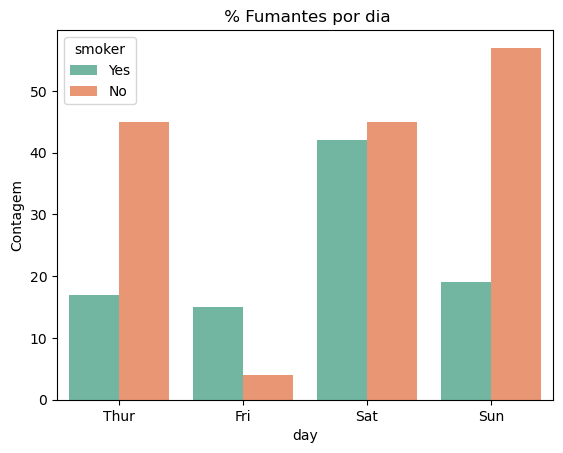

In [9]:
sns.countplot(data=tips, x="day" , hue = "smoker", palette="Set2")
plt.title(f" % Fumantes por dia")
plt.ylabel("Contagem")
plt.show

Mapa de calor com os fumantes


C:\Users\Cauan\AppData\Local\Temp\ipykernel_14128\2980137549.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = tips.groupby("day")["smoker"].value_counts(normalize= True).unstack().fillna(0) * 100


<Axes: xlabel='smoker', ylabel='day'>

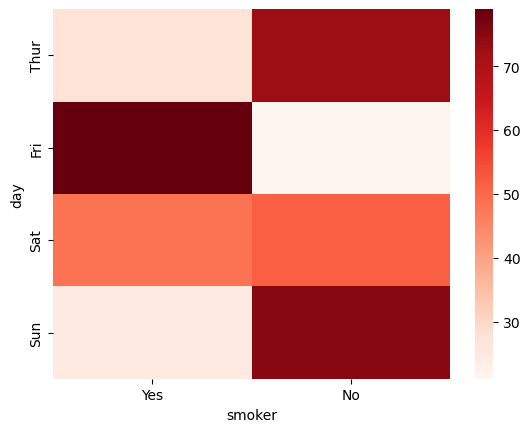

In [10]:
proportions = tips.groupby("day")["smoker"].value_counts(normalize= True).unstack().fillna(0) * 100
sns.heatmap(proportions, annot= False, cmap="Reds")

                                              Descobrindo gojeta por sexo e dia

In [11]:
tips.groupby(["sex","day"])["tip"].agg(["mean", "count", "sum"]).round(2)

C:\Users\Cauan\AppData\Local\Temp\ipykernel_14128\3547662845.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["sex","day"])["tip"].agg(["mean", "count", "sum"]).round(2)


mean  count     sum
sex    day                      
Male   Thur  2.98     30   89.41
       Fri   2.69     10   26.93
       Sat   3.08     59  181.95
       Sun   3.22     58  186.78
Female Thur  2.58     32   82.42
       Fri   2.78      9   25.03
       Sat   2.80     28   78.45
       Sun   3.37     18   60.61

Mulheres com mais gorjeta na quinta e homens com mais gorjeta no domingo, no sábado e no domingo o número de gorjeta é maior que quinta e sexta(Na parte masculina) e sexta tende a ser o dia mais fraco de gorjeta.

                                         Correlação numérica

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

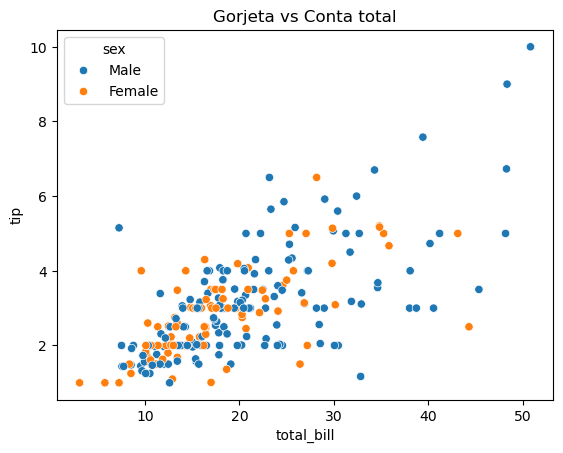

In [14]:
print(tips[["total_bill", "tip", "size"]].corr())
sns.scatterplot(data=tips, x= "total_bill", y= "tip", hue= "sex")
plt.title("Gorjeta vs Conta total")
plt.show

Agrupando por dia e tempo(Descobrindo qual horario rende mais e em quais dias.)

In [19]:
tips.groupby(["day", "time"])["total_bill"].agg("sum").round(0)

C:\Users\Cauan\AppData\Local\Temp\ipykernel_14128\2983967438.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["day", "time"])["total_bill"].agg("sum").round(0)


day   time  
Thur  Lunch     1078.0
      Dinner      19.0
Fri   Lunch       90.0
      Dinner     236.0
Sat   Lunch        0.0
      Dinner    1778.0
Sun   Lunch        0.0
      Dinner    1627.0
Name: total_bill, dtype: float64